# Parameters tuning

In [1]:
%load_ext autoreload
%autoreload

#Imports
import sys
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import Normalizer, StandardScaler
from time import perf_counter

sys.path.append('../')
from LinearModels import display_plot_svc

/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


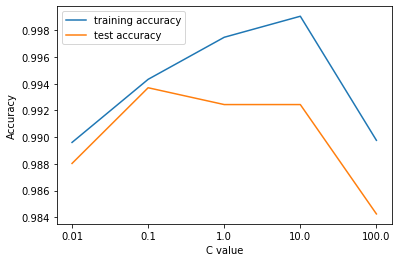

In [9]:
display_plot_svc('../../../dumps/various_sizes/8K.csv',0.20,0.01,100)

In [2]:
gt = pd.read_csv('../../../dumps/various_sizes/8K.csv')
cols = [col for col in gt.columns if col not in ['label']]
data = gt[cols]
target = gt['label']

data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.20, random_state = 0)
scaler = StandardScaler()
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

In [17]:
for i in ["hinge","squared_hinge"]:
    print("Loss function : %s" % i)
    tree = LinearSVC(loss=i, max_iter=100000, random_state=0) 
    tree.fit(data_train, target_train)
    print("Accuracy on training set: {:.3f}".format(tree.score(data_train, target_train))) 
    print("Accuracy on test set: {:.3f}".format(tree.score(data_test, target_test)))

Loss function : hinge


/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on training set: 0.997
Accuracy on test set: 0.990
Loss function : squared_hinge
Accuracy on training set: 0.997
Accuracy on test set: 0.992


In [23]:
gt = pd.read_csv('../../../dumps/various_sizes/8K.csv')
cols = [col for col in gt.columns if col not in ['label']]
data = gt[cols]
target = gt['label']
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.20, random_state = 0)
scaler = StandardScaler()
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

In [19]:
parameters = {'C': [0.01,0.1, 1, 10, 100], 'max_iter':[100,1000,10000]}
clf = GridSearchCV(LinearSVC(), parameters, n_jobs=-1)
clf.fit(data_train, target_train)
print(clf.score(data_train, target_train))
print(clf.best_params_)
print(clf.score(data_test, target_test))
print(clf.best_params_)

0.995274102079395
{'C': 1, 'max_iter': 100}
0.9930686830497795
{'C': 1, 'max_iter': 100}


/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [20]:
parameters = {'C': [0.01,0.1, 1, 10, 100], 'max_iter':[100,1000,10000]}
clf = RandomizedSearchCV(LinearSVC(), parameters, n_jobs=-1)
clf.fit(data_train, target_train)
print(clf.score(data_train, target_train))
print(clf.best_params_)
print(clf.score(data_test, target_test))
print(clf.best_params_)

0.997164461247637
{'max_iter': 10000, 'C': 1}
0.9924385633270322
{'max_iter': 10000, 'C': 1}


/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [24]:
svc = LinearSVC(C=0.1, random_state=0)
start = perf_counter()
svc.fit(data_train, target_train)
end = perf_counter()
print("Training set score: {:.3f}".format(svc.score(data_train, target_train))) 
print("Test set score: {:.3f}".format(svc.score(data_test, target_test)))
print(end-start)

Training set score: 0.994
Test set score: 0.994
0.39628189499990185


/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [25]:
svc = LinearSVC(C=0.1, max_iter=10000, random_state=0)
start = perf_counter()
svc.fit(data_train, target_train)
end = perf_counter()
print("Training set score: {:.3f}".format(svc.score(data_train, target_train))) 
print("Test set score: {:.3f}".format(svc.score(data_test, target_test)))
print(end-start)

Training set score: 0.994
Test set score: 0.994
1.189869001000261
